In [27]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').values.ravel()
X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').values.ravel()

# Logistic Regression

In [3]:
params = {'penalty': ['l1', 'l2', 'elasticnet'],
          'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
          'max_iter': [3000]}

gscv = GridSearchCV(LogisticRegression(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\mo

{'max_iter': 3000, 'penalty': 'l1', 'solver': 'liblinear'}

In [4]:
gscv.score(X_train, y_train)

0.8381962864721485

In [23]:
lr = LogisticRegression(max_iter=3000, penalty='l1', solver='liblinear')
lr.fit(X_train,y_train).score(X_train, y_train)

0.8381962864721485

In [24]:
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.40


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.40')

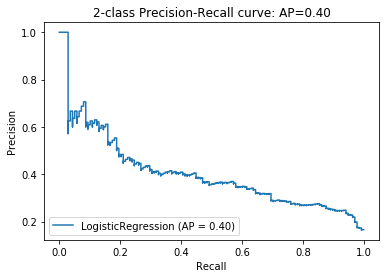

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [18]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,gender,-0.172248
1,age,-0.011191
2,age_o,-0.028074
3,int_corr,0.267339
4,samerace,-0.085863
5,date,-0.097880
6,exphappy,-0.038985
7,attr3_1,0.057736
8,sinc3_1,0.006672
9,fun3_1,-0.028522


# Support Vector Machine

In [3]:
params = {'penalty': ['l1', 'l2', 'elasticnet'],
          'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'],
          'max_iter': [3000]}

gscv = GridSearchCV(SVC(), params, cv=3)
gscv.fit(X_train, y_train)
gscv.best_params_

F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
F:\Programs\Anaconda3\lib\site-packages\sklearn\mo

{'max_iter': 3000, 'penalty': 'l1', 'solver': 'liblinear'}

In [4]:
gscv.score(X_train, y_train)

0.8381962864721485

In [28]:
lr = SVC()
lr.fit(X_train,y_train).score(X_train, y_train)

0.8352785145888594

In [29]:
y_score = lr.decision_function(X_train)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.39


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.39')

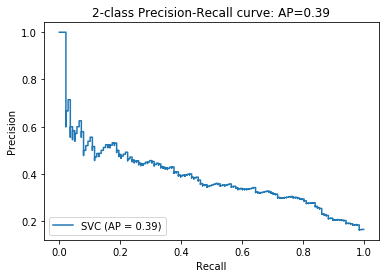

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))